# Exploratory Data Analysis of ScentAI

### Table of Contents
1. Load the data
2. Explore the data
3. Handle missing values
4. Handle outliers
5. Data transformations
6. Data visualization
7. Model selection
8. Model evaluation (Next page...)

### 1. Load the data

In [130]:
import pandas as pd

df = pd.read_csv('raw_noon.csv') # raw data

df.head()

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K
1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K
2,2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K
3,3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K
4,4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K


### The dataset includes the following variables:

| Column Name | Description |
|-------------|-------------|
| brand | The brand of the scent product |
| name | The name of the scent product |
| old_price | The original price of the scent product |
| new_price | The current price of the scent product |
| ml | The volume of the scent product in milliliters |
| concentration | The concentration of the scent product (e.g. Eau de Toilette, Eau de Parfum) |
| department | The department or category of the scent product |
| scents | The top notes of the scent product |
| base_note | The base notes of the scent product |
| middle_note | The middle notes of the scent product |
| item_rating | The average rating of the scent product on the online marketplace |
| seller | The seller of the scent product |
| seller_rating | The rating of the scent product's seller on the online marketplace |
| num_seller_ratings | The number of ratings the scent product's seller has received on the online marketplace |

### 2. Explore data

In [9]:
df.tail() # check last few columns

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
998,998,GUESS,Dare,170.0,75.00,100,EDT,Women,Citrus,"Coconut Accords, Wood, Musk","Wild Rose, Elegant Jasmine",4.9,noon,4.2,98.1K
999,999,BURBERRY,For Women EDP Natural Sp,378.0,153.75,100,EDT,Women,Fruity,Musk And Vanilla,"Woody-Floral, Sandalwood And Cedar",4.8,noon,4.2,98.1K
1000,1000,JOVAN,Musk Cologne Sp,55.0,19.00,59,EDT,Women,Woody,"Musk, Amber, Wood",Ylang-ylang,4.7,Cute,3.7,1.9K
1001,1001,SWISS ARABIAN,Layali CPO At,126.0,77.00,15,EDT,Unisex,Arabian,Agarwood and Amber,"Ylang-Ylang, Rose and Jasmine",4.0,Swiss Arabian PerfumesPRICE UPDATE WITH 15% VA...,3.9,5
1002,1002,LACOSTE,L.12.12 Blanc-Pure,347.0,94.20,100,EDT,Men,Woody,"Virginia Cedar, Leather, Suede, Vetiver","Ylang-Ylang, Tuberose",4.6,noon,4.2,98.1K


In [7]:
df.shape # rows x columns

(1003, 15)

In [10]:
df.info # check for missing values 

<bound method DataFrame.info of       Unnamed: 0            brand                      name  old_price  \
0              0     PACO RABANNE           1 Million Lucky      395.0   
1              1  Roberto Cavalli         Paradiso Assoluto      415.0   
2              2       S.T.Dupont               Royal Amber      265.0   
3              3            GUESS            Seductive Blue      290.0   
4              4  Roberto Cavalli                      Uomo      260.0   
...          ...              ...                       ...        ...   
998          998            GUESS                      Dare      170.0   
999          999         BURBERRY  For Women EDP Natural Sp      378.0   
1000        1000            JOVAN           Musk Cologne Sp       55.0   
1001        1001    SWISS ARABIAN             Layali CPO At      126.0   
1002        1002          LACOSTE        L.12.12 Blanc-Pure      347.0   

      new_price   ml concentration department   scents  \
0        244.55  100 

In [11]:
df.describe() # summary statistics

,Unnamed: 0,old_price,new_price,ml,item_rating,seller_rating
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,501.000000,321.176022,149.574307,92.862413,4.530907,14.143170
std,289.685462,234.195846,108.686013,27.496053,0.555504,64.706572
min,0.000000,5.350000,5.350000,1.000000,1.000000,3.500000
25%,250.500000,140.500000,80.325000,80.000000,4.400000,3.800000
50%,501.000000,310.000000,135.000000,100.000000,4.600000,3.900000
75%,751.500000,455.000000,198.525000,100.000000,5.000000,4.200000
max,1002.000000,2350.000000,904.850000,200.000000,5.000000,454.000000


In [12]:
df['department'].value_counts() # discrete values

Women          503
Men            433
Unisex          66
Kids Unisex      1
Name: department, dtype: int64

In [14]:
df['concentration'].value_counts()

EDT    503
EDP    494
PDT      3
Oil      2
EDC      1
Name: concentration, dtype: int64

In [13]:
df.corr() # check for any type of correlation 

/var/folders/3l/qm1h__810wxdvb5khb64r2dw0000gn/T/ipykernel_62474/159544976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # check for any type of correlation


,Unnamed: 0,old_price,new_price,ml,item_rating,seller_rating
Unnamed: 0,1.000000,-0.004149,-0.029880,0.002419,-0.039986,0.057831
old_price,-0.004149,1.000000,0.843291,0.136681,0.076632,-0.089829
new_price,-0.029880,0.843291,1.000000,0.144291,0.105685,-0.009339
ml,0.002419,0.136681,0.144291,1.000000,-0.028908,0.027020
item_rating,-0.039986,0.076632,0.105685,-0.028908,1.000000,-0.036039
seller_rating,0.057831,-0.089829,-0.009339,0.027020,-0.036039,1.000000


### 3. Handle Missing Values

In [15]:
df.isnull().sum() # check for missing values

Unnamed: 0            0
brand                 0
name                  0
old_price             0
new_price             0
ml                    0
concentration         0
department            0
scents                0
base_note             0
middle_note           0
item_rating           0
seller                0
seller_rating         0
num_seller_ratings    0
dtype: int64

BAM we are good!!! no missing values.

### 4. Handle outliers

**First lets do some Distribution Analysis for these variables:**

`old_price`: This variable represents the original price of each perfume, which could have a wide range of values.

`new_price`: This variable represents the discounted price of each perfume, which could also have a wide range of values.
    
`ml`: This variable represents the volume of each perfume in milliliters, which could have a normal or skewed distribution.
    
`item_rating`: This variable represents the rating of each perfume, which could have a normal or bimodal distribution.


*Side note:*

If the variable is **categorical**, you can use `value_counts()` function to get the frequency distribution of each category.

If the variable is **numerical**, you can use `hist()` or `distplot()` function from the Seaborn library to create a histogram and visualize its distribution.

<Axes: >

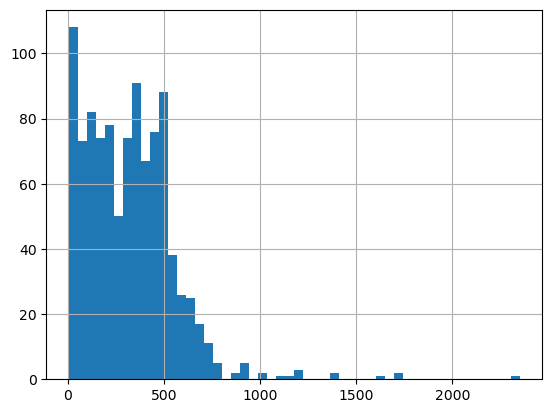

In [18]:
# plot distribution of variables: old_price
df['old_price'].hist(bins=50)

<Axes: >

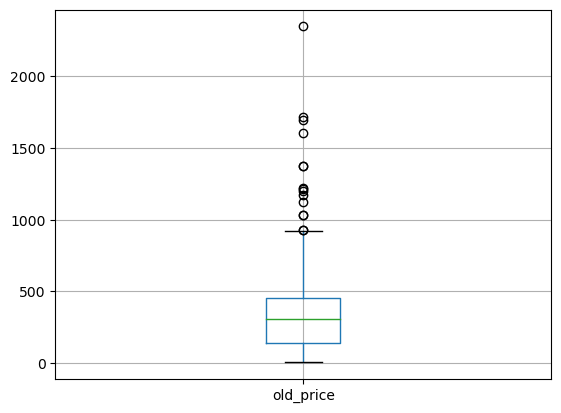

In [19]:
df.boxplot(column='old_price')

We can conclude a few outliers in this variable. Maybe this is due to some brands having different pricing strategies, and other high-end luxury brands price their products significantly higher than others. MAnother possibility is because of rarity of the product. 

<Axes: >

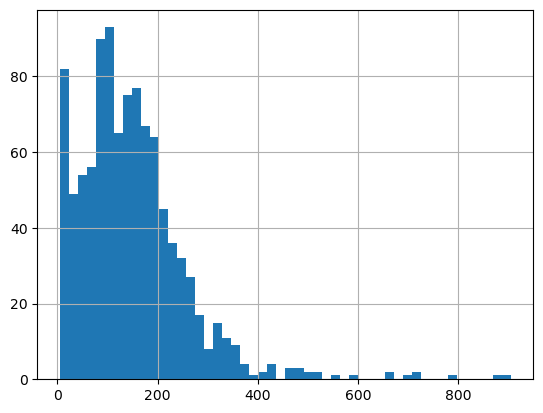

In [20]:
# plot distribution of variables: new_price
df['new_price'].hist(bins=50)

<Axes: >

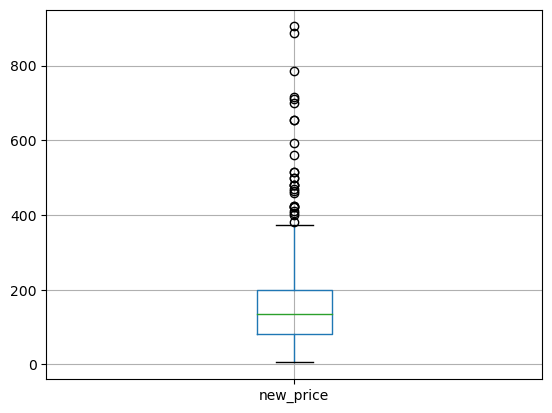

In [21]:
df.boxplot(column='new_price')

It is possible that there are fewer outliers in the new_price variable compared to the old_price variable because the new_price variable represents the discounted price of each perfume.

<Axes: >

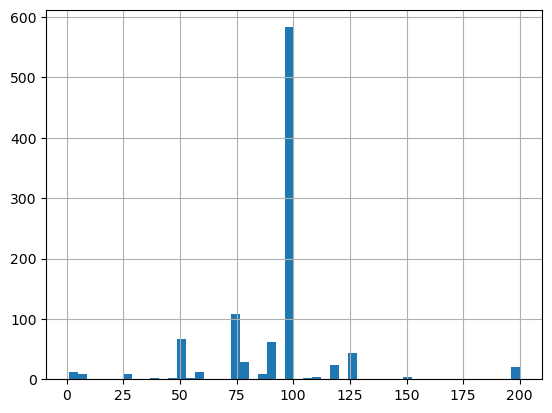

In [22]:
# plot distribution of variables: ml
df['ml'].hist(bins=50)

<Axes: >

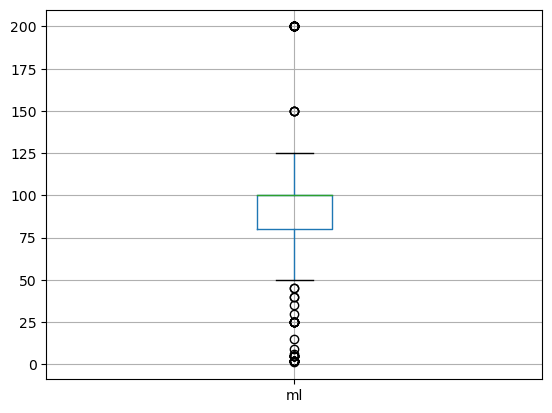

In [25]:
df.boxplot(column='ml')

The ml variable, which represents the volume of each perfume in milliliters, can have outliers for several reasons. First, the volume of perfumes varies based on their type, brand, and packaging design, leading to a wider range of values. Then, errors or inconsistencies in data, such as incorrect volume measurements, can result in outliers. Finally, limited edition or rare perfumes with unique packaging or bottle designs may have volumes significantly higher or lower than the average, resulting in outliers. 

<Axes: >

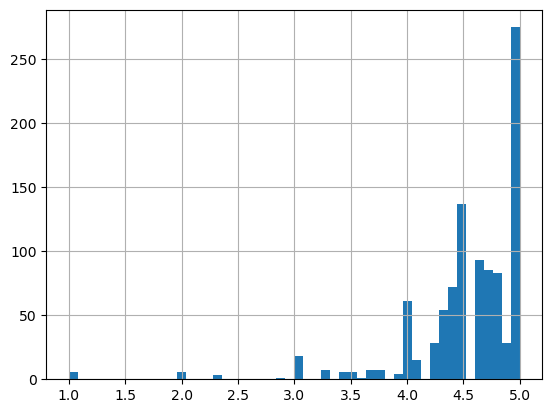

In [23]:
# plot distribution of variables: item_rating
df['item_rating'].hist(bins=50)

<Axes: >

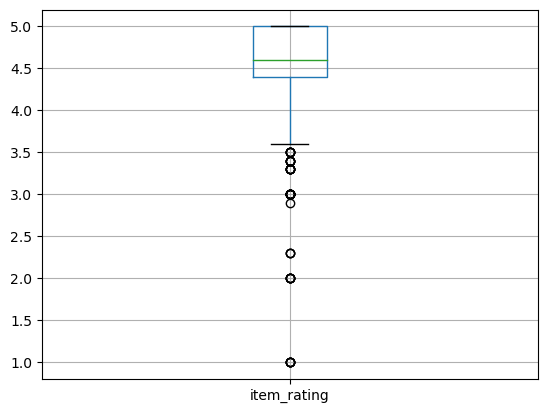

In [27]:
df.boxplot(column='item_rating')

There could be outliers in the item_rating variable because the ratings of perfumes are subjective and can vary significantly depending on personal preferences and biases. Additionally, the distribution of ratings in the population may not necessarily follow a normal distribution.

### 5. Data Transformations 

Now that we've done distribution analysis and handled the outliers, its time to do some engineering on **Categorical Variable Analysis**.

In [28]:
# first we need to check for datatypes
print(df.dtypes)

Unnamed: 0              int64
brand                  object
name                   object
old_price             float64
new_price             float64
ml                      int64
concentration          object
department             object
scents                 object
base_note              object
middle_note            object
item_rating           float64
seller                 object
seller_rating         float64
num_seller_ratings     object
dtype: object


If the data type is object, then the variable is likely to be categorical.

In [53]:
# use one-hot encoding to convert department into a numerical variable (0 = false, 1 = true)
df_encoded = pd.concat([df, pd.get_dummies(df['department'], prefix='department')], axis=1)
df_encoded

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,department_Kids Unisex,department_Men,department_Unisex,department_Women
0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K,0,1,0,0
1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K,0,0,0,1
2,2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K,0,0,1,0
3,3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K,0,1,0,0
4,4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,998,GUESS,Dare,170.0,75.00,100,EDT,Women,Citrus,"Coconut Accords, Wood, Musk","Wild Rose, Elegant Jasmine",4.9,noon,4.2,98.1K,0,0,0,1
999,999,BURBERRY,For Women EDP Natural Sp,378.0,153.75,100,EDT,Women,Fruity,Musk And Vanilla,"Woody-Floral, Sandalwood And Cedar",4.8,noon,4.2,98.1K,0,0,0,1
1000,1000,JOVAN,Musk Cologne Sp,55.0,19.00,59,EDT,Women,Woody,"Musk, Amber, Wood",Ylang-ylang,4.7,Cute,3.7,1.9K,0,0,0,1
1001,1001,SWISS ARABIAN,Layali CPO At,126.0,77.00,15,EDT,Unisex,Arabian,Agarwood and Amber,"Ylang-Ylang, Rose and Jasmine",4.0,Swiss Arabian PerfumesPRICE UPDATE WITH 15% VA...,3.9,5,0,0,1,0


In [54]:
# Perform one-hot encoding on the concentration column (0 = false, 1 = true)
df_encoded = pd.concat([df_encoded, pd.get_dummies(df_encoded['concentration'], prefix='concentration')], axis=1)
df_encoded

,Unnamed: 0,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,...,num_seller_ratings,department_Kids Unisex,department_Men,department_Unisex,department_Women,concentration_EDC,concentration_EDP,concentration_EDT,concentration_Oil,concentration_PDT
0,0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver",...,98.1K,0,1,0,0,0,0,1,0,0
1,1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",...,98.1K,0,0,0,1,0,1,0,0,0
2,2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",...,98.1K,0,0,1,0,0,1,0,0,0
3,3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",...,98.1K,0,1,0,0,0,0,1,0,0
4,4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",...,98.1K,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,998,GUESS,Dare,170.0,75.00,100,EDT,Women,Citrus,"Coconut Accords, Wood, Musk",...,98.1K,0,0,0,1,0,0,1,0,0
999,999,BURBERRY,For Women EDP Natural Sp,378.0,153.75,100,EDT,Women,Fruity,Musk And Vanilla,...,98.1K,0,0,0,1,0,0,1,0,0
1000,1000,JOVAN,Musk Cologne Sp,55.0,19.00,59,EDT,Women,Woody,"Musk, Amber, Wood",...,1.9K,0,0,0,1,0,0,1,0,0
1001,1001,SWISS ARABIAN,Layali CPO At,126.0,77.00,15,EDT,Unisex,Arabian,Agarwood and Amber,...,5,0,0,1,0,0,0,1,0,0


### 6. Data Viz

Now time for the fun stuff!!!

In [58]:
# Filter the data to include only products marketed towards men
men_df = df[df['department'] == 'Men']

# Calculate the average old price and new price for men
avg_old_price = men_df['old_price'].mean()
avg_new_price = men_df['new_price'].mean()

# Calculate the average discount for men
avg_discount = (avg_old_price - avg_new_price) / avg_old_price * 100

print("Average old price for men: $", avg_old_price)
print("Average new price for men: $", avg_new_price)
print("Average discount for men: $", avg_discount)

Average old price for men: $ 303.7473441108545
Average new price for men: $ 138.89891454965357
Average discount for men: $ 54.27156245390526


In [59]:
# Filter the data to include only products marketed towards Women
women_df = df[df['department'] == 'Women']

# Calculate the average old price and new price for men
avg_old_price = women_df['old_price'].mean()
avg_new_price = women_df['new_price'].mean()

# Calculate the average discount for men
avg_discount = (avg_old_price - avg_new_price) / avg_old_price * 100

print("Average old price for women: $", avg_old_price)
print("Average new price for women: $", avg_new_price)
print("Average discount for women: $", avg_discount)

Average old price for women: $ 349.4083499005964
Average new price for women: $ 162.918986083499
Average discount for women: $ 53.37289846397546


Well, will you look at that. We can clearly see that the average prices in Women products are significantly higher than those of Men's. The reason maybe due to supply and demand, women tends to spend more than men then it makes perfect sense for this reason.

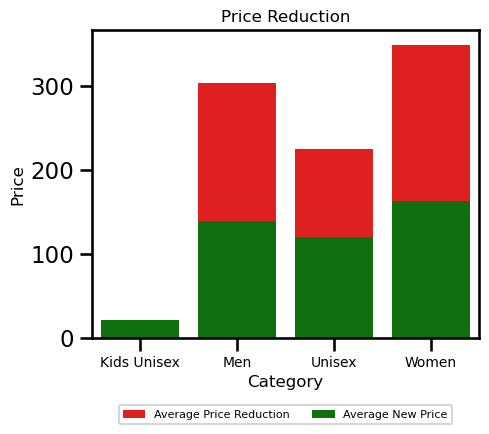

In [131]:
# we can further visualize this Price Reduction with a bar chart
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

avg_old_price = df.groupby('department')['old_price'].mean().reset_index()
avg_new_price = df.groupby('department')['new_price'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(5,4))

sns.barplot(x="department", y="old_price", data=avg_old_price, color='red', label='Average Price Reduction')
sns.barplot(x="department", y="new_price", data=avg_new_price, color='green', label='Average New Price')
sns.set_context("talk")
plt.title('Price Reduction', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(fontsize=10) # adjust font size of category labels
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=2, fontsize=8)
plt.show()

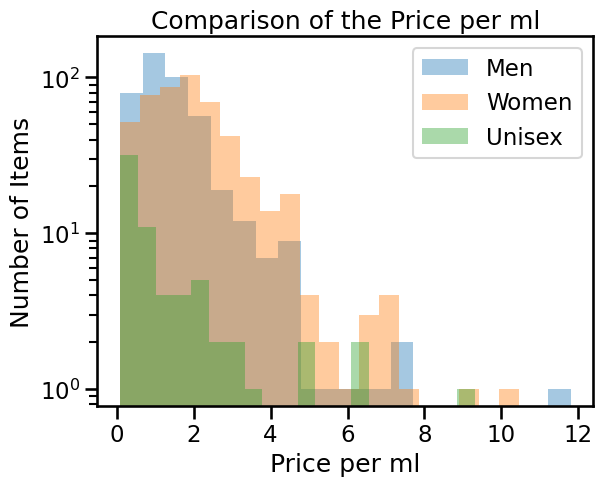

In [132]:
# Create a new column called price_per_ml
df['price_per_ml'] = df['new_price'] / df['ml']

departments = ['Men', 'Women', 'Unisex']

# visualize data
plt.hist(df.loc[df['department'] == 'Men', 'price_per_ml'], alpha=0.4, label='Men', density=False, bins=20)
plt.hist(df.loc[df['department'] == 'Women', 'price_per_ml'], alpha=0.4, label='Women', density=False, bins=20)
plt.hist(df.loc[df['department'] == 'Unisex', 'price_per_ml'], alpha=0.4, label='Unisex', density=False, bins=20)
plt.yscale('log')
plt.xticks(ticks=[0,2,4,6,8,10,12], labels=None)
plt.title('Comparison of the Price per ml')
plt.xlabel('Price per ml')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

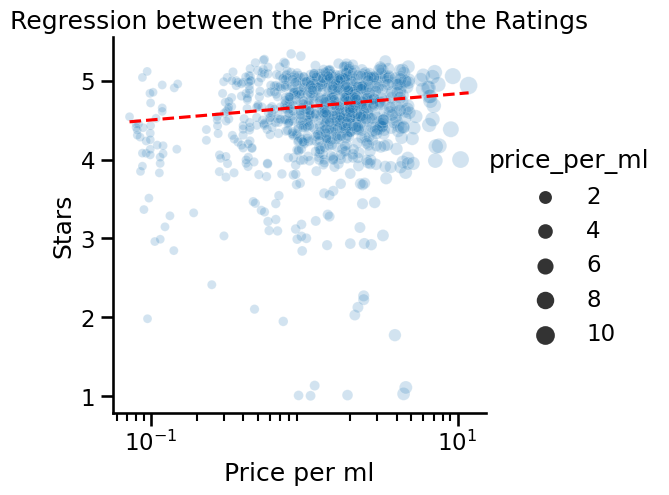

In [154]:
# lets see if there is a relationship between price and ratings
import numpy as np
from sklearn.linear_model import LinearRegression

# Fit linear regression model
X = df['price_per_ml'].values.reshape(-1, 1)
y = df['item_rating'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)

# Calculate regression line
fx = np.array([df['price_per_ml'].min(), df['price_per_ml'].max()]).reshape(-1, 1)
fy = reg.predict(fx)

# Add jitter to ratings
rate_jitter = df['item_rating'] + np.random.normal(0, 0.1, size=len(df))

# Plot scatter plot with regression line
sns.relplot(x = df['price_per_ml'], y = rate_jitter, kind = 'scatter', alpha = 0.2, size = df['price_per_ml'])
plt.plot(fx, fy, '--', color = 'red')
plt.xscale('log')
plt.xticks(ticks = [0.1,10], labels=None)
plt.title('Regression between the Price and the Ratings')
plt.xlabel('Price per ml')
plt.ylabel('Stars')
plt.show()

In [162]:
# Top 10 scents for Men

# Subset the DataFrame to only include men's fragrances
men_df = df[df['department'] == 'Men']

# Group by scent name and calculate the average rating for each scent
scent_ratings = men_df.groupby('scents')['item_rating'].mean()

# Sort the scents by their average rating in descending order
top_scents = scent_ratings.sort_values(ascending=False)

# Select the top 10 scents from the sorted list
top_10_scents = top_scents.head(10)

# Print the top 10 scents
print('Top 10 scents for Men: ', + top_10_scents)

Top 10 scents for Men:  scents
Jasmine           5.000000
Sweet Aromatic    4.800000
Oriental          4.625000
Musk              4.600000
Spicy             4.573333
Citrus            4.523729
Woody             4.497794
Vanilla           4.476923
Fruity            4.444444
Fresh             4.342857
Name: item_rating, dtype: float64


In [199]:
# Top 10 scents for Women

# Subset the DataFrame to only include Women's fragrances
women_df = df[df['department'] == 'Women']

# Group by scent name and calculate the average rating for each scent
scent_ratings = women_df.groupby('scents')['item_rating'].mean()

# Sort the scents by their average rating in descending order
top_scents = scent_ratings.sort_values(ascending=False)

# Select the top 10 scents from the sorted list
top_10_scents = top_scents.head(15)

# Print the top 10 scents
print('Top 10 scents for Women: ', + top_10_scents)

Top 10 scents for Women:  scents
Oriental, Floral       5.000000
Arabian                4.736842
Vanilla                4.681818
Fruity                 4.622034
Citrus                 4.613793
Floral                 4.612644
Sandalwood             4.600000
Fresh                  4.558333
Floral and Oriental    4.550000
Woody                  4.526829
Musk                   4.500000
Spicy                  4.488235
Oriental               4.447368
Clean                  4.300000
Jasmine                3.575000
Name: item_rating, dtype: float64


Now time to plot both graphs but first we need to check for frequency of each notes.

In [221]:
# Count frequencies of each note for Women

# Subset the DataFrame to only include Women's fragrances
women_df = df[df['department'] == 'Women']

# Get the notes for each fragrance in the top 10 scents
top_scents_notes = women_df[women_df['scents'].isin(top_10_scents.index)][['base_note', 'middle_note']]

# Concatenate the base and middle notes for each fragrance
top_scents_notes['notes'] = top_scents_notes['base_note'] + ' ' + top_scents_notes['middle_note']

# Count the frequency of each note across all fragrances in the top 10 scents
note_counts = {}
for notes in top_scents_notes['notes']:
    for note in notes.replace('/', ' ').replace(',', ' ').split():
        note = note.lower()
        if note == 'and':
            continue  # skip counting the "and" note
        if note in note_counts:
            note_counts[note] += 1
        else:
            note_counts[note] = 1

# Sort the notes by their frequency in descending order
sorted_notes = sorted(note_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 notes
print('Top 10 notes for Women:')
for note, count in sorted_notes[:10]:
    print(note, count)

Top 10 notes for Women:
jasmine 285
musk 271
vanilla 207
rose 204
sandalwood 190
amber 174
patchouli 135
cedar 90
blossom 80
orange 79


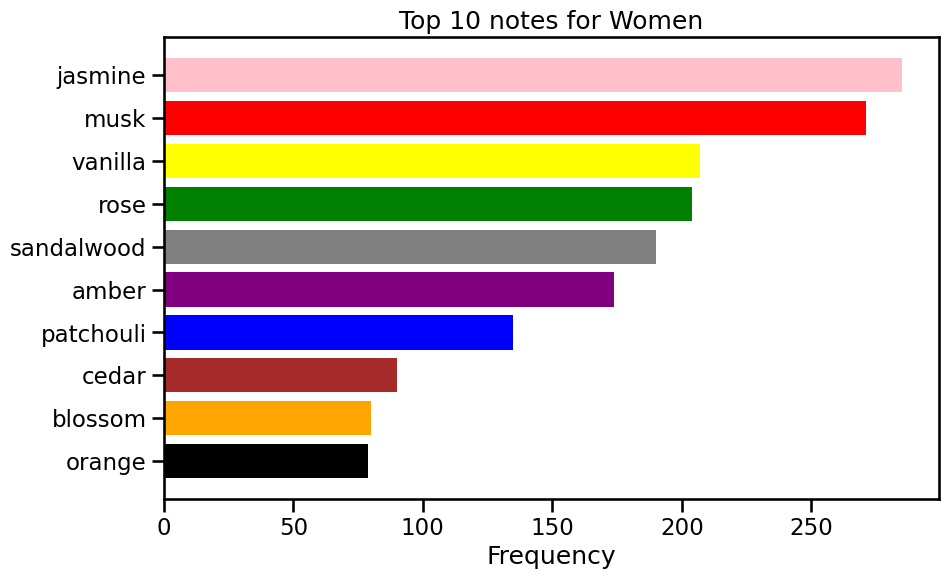

In [222]:
# plot a horizontal bar
colors = ['pink', 'red', 'yellow', 'green', 'gray', 'purple', 'blue', 'brown', 'orange', 'black']

# Plot a horizontal bar with colored bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh([note for note, count in sorted_notes[:10]], [count for note, count in sorted_notes[:10]], color=colors)
ax.invert_yaxis()
ax.set_xlabel('Frequency')
ax.set_title('Top 10 notes for Women')
plt.show()

In [218]:
# Count frequencies of each note for Men

# Subset the DataFrame to only include Men's fragrances
men_df = df[df['department'] == 'Men']

# Get the notes for each fragrance in the top 10 scents
top_scents_notes = men_df[men_df['scents'].isin(top_10_scents.index)][['base_note', 'middle_note']]

# Concatenate the base and middle notes for each fragrance
top_scents_notes['notes'] = top_scents_notes['base_note'] + ' ' + top_scents_notes['middle_note']

# Count the frequency of each note across all fragrances in the top 10 scents
note_counts = {}
for notes in top_scents_notes['notes']:
    for note in notes.replace('/', ' ').replace(',', ' ').split():
        note = note.lower()
        if note == 'and':
            continue  # skip counting the "and" note
        if note in note_counts:
            note_counts[note] += 1
        else:
            note_counts[note] = 1

# Sort the notes by their frequency in descending order
sorted_notes = sorted(note_counts.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 notes
print('Top 10 notes for Men:')
for note, count in sorted_notes[:10]:
    print(note, count)

Top 10 notes for Men:
patchouli 170
cedar 166
amber 165
musk 162
sandalwood 132
vetiver 124
tonka 113
jasmine 96
geranium 91
bean 84


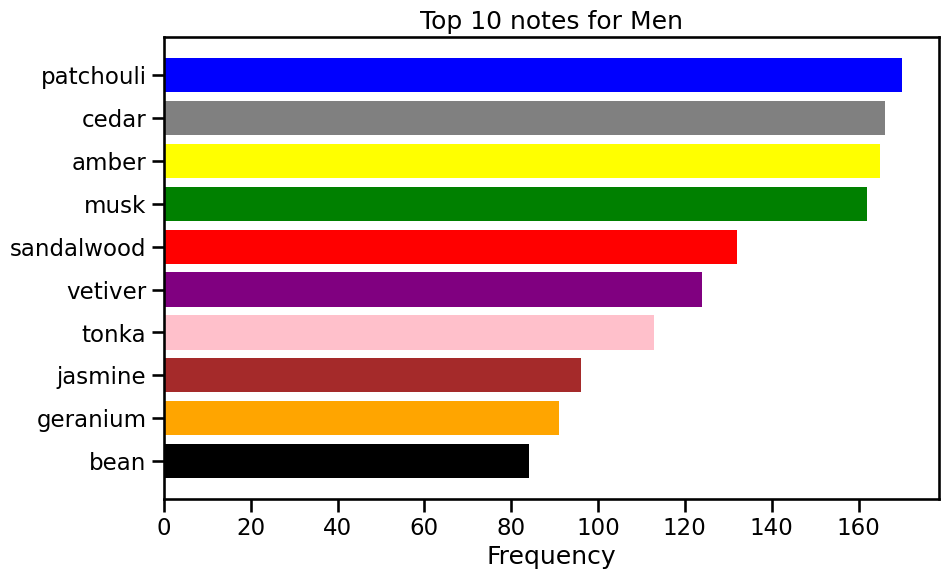

In [220]:
# plot a horizontal bar
colors = ['blue', 'gray', 'yellow', 'green', 'red', 'purple', 'pink', 'brown', 'orange', 'black']

# Plot a horizontal bar with colored bars
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh([note for note, count in sorted_notes[:10]], [count for note, count in sorted_notes[:10]], color=colors)
ax.invert_yaxis()
ax.set_xlabel('Frequency')
ax.set_title('Top 10 notes for Men')
plt.show()

    Men's top 3 are: patchouli, cedar, amber. 
    Women's top 3: jasmine, musk, vanilla
    
Well, I'm surprised not a lot of women like amber, but its reasonable they would choose something more feminine and I do like the smell of amber and musk :)

### 7. Model Selection

Now its time to build our model. We will choose from below:

1. Cosine Similarity:
    - Description of the scent (e.g., floral, fruity, spicy, woody, etc.)
    - Notes of the scent (e.g., top notes, middle notes, base notes)
    - Perfumer or brand
    - Seasonality (e.g., spring, summer, fall, winter)
    - Occasion (e.g., casual, formal, evening, daytime)

2. Content-Based Filtering:
    - User preferences (e.g., favorite scents, disliked scents)
    - Previous purchases or ratings
    - Price range
    - Product availability
    - Brand preferences

3. Neural Networks:
    - Similar variables to cosine similarity and content-based filtering, as well as:
    - User behavior on the platform (e.g., click-through rates, time spent browsing, etc.)
    - Demographic information (e.g., age, gender, location, etc.)

4. Decision Trees:
    - Variables similar to the above models, as well as:
    - Customer segmentation (e.g., high spenders, budget-conscious, frequent purchasers, etc.)
    - Customer loyalty (e.g., how frequently they return to make purchases)

5. Matrix Factorization:
    - Variables similar to the above models, as well as:
    - Co-purchasing behavior (e.g., what products are commonly purchased together)
    - Product popularity (e.g., how frequently a product is purchased or viewed)


Well, In this case I think its alot more efficient to use 1,2,5 but we will still try to play around with all of them because WHY NOT! (Examples included but not limited to)

### 8. Model Evaluation

##### See you on the next chapter!!!! .(๓´͈ ˘ `͈๓).🌙.｡★*ﾟ